
- under50	(13.5-6.9%)	least vaccinated group
- 50-59	(66.3%)	medium vaccinated group
- above60	(90-100%)	most vaccinated group

In [233]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [253]:
df_raw = pd.read_csv('export/ccaa_indexes.csv')
df_raw.head()

,fecha,grupo_edad,ccaa_iso,num_casos,num_def,num_hosp,num_uci
0,2020-01-01,0-9,AN,0,0,0,0
1,2020-01-01,0-9,AR,0,0,0,0
2,2020-01-01,0-9,AS,0,0,0,0
3,2020-01-01,0-9,CB,0,0,0,0
4,2020-01-01,0-9,CL,0,0,0,0


In [206]:
url = 'https://raw.githubusercontent.com/X80110/covid-vaccination-tracker/xavier/app/public/data1dose.csv'
vax_raw = pd.read_csv(url, decimal=',', thousands='.')

In [207]:
vax_raw.head()

,ccaa,dose1_80,pop_80,perc_80,dose1_70,pop_70,perc_70,dose1_60,perc_60,dose1_50,...,dose1_18,pop_18,perc_18,dose1_16,pop_16,perc_16,dose1_total,pop_total,perc_total,fecha
0,Andalucía,375382.0,413.516,"90,8%",21.914,916.147,"3,4%",60757.0,"6,6%",133.942,...,24.984,625.846,"4,0%",144,181.921,"0,1%",933984.0,7.062.213,"13,2%",2021-03-30T22:00:00.000Z
1,Andalucía,391814.0,413.516,"94,8%",27.887,916.147,"4,3%",70060.0,"7,6%",135.371,...,25.491,625.846,"4,1%",152,181.921,"0,1%",969236.0,7.062.213,"13,7%",2021-03-31T22:00:00.000Z
2,Andalucía,395442.0,413.516,"95,6%",30.501,916.147,"4,7%",75084.0,"8,2%",135.587,...,25.655,625.846,"4,1%",154,181.921,"0,1%",981657.0,7.062.213,"13,9%",2021-04-02T22:00:00.000Z
3,Andalucía,396168.0,413.516,"95,8%",34.176,916.147,"5,3%",83158.0,"9,1%",135.867,...,25.892,625.846,"4,1%",154,181.921,"0,1%",994982.0,7.062.213,"14,1%",2021-04-04T22:00:00.000Z
4,Andalucía,398827.0,413.516,"96,4%",47.996,916.147,"7,4%",101365.0,"11,1%",137.105,...,26.233,625.846,"4,2%",163,181.921,"0,1%",1032500.0,7.062.213,"14,6%",2021-04-05T22:00:00.000Z


In [327]:
vax_raw.columns

Index(['ccaa', 'dose1_80', 'pop_80', 'perc_80', 'dose1_70', 'pop_70',
       'perc_70', 'dose1_60', 'perc_60', 'dose1_50', 'pop_50', 'perc_50',
       'dose1_25', 'pop_25', 'perc_25', 'dose1_18', 'pop_18', 'perc_18',
       'dose1_16', 'pop_16', 'perc_16', 'dose1_total', 'pop_total',
       'perc_total', 'fecha'],
      dtype='object')

### Convert seperator

In [208]:
def dot2comma(x):
    x = str(x).replace('.', '')
    return x

def comma2dot(x):
    x = str(x).replace(',', '.')
    return x

for col in vax_raw.columns:
    if col[:3] != 'per':
        vax_raw[col] =  vax_raw[col].apply(dot2comma)
    else:
        vax_raw[col] =  vax_raw[col].apply(comma2dot)

In [209]:
# remove any row contains text na
vax = vax_raw[(vax_raw!='nan').all(1)]

In [215]:
national = vax[vax['ccaa'] == 'Total España']
national.head(3)

,ccaa,dose1_80,pop_80,perc_80,dose1_70,pop_70,perc_70,dose1_60,perc_60,dose1_50,...,dose1_18,pop_18,perc_18,dose1_16,pop_16,perc_16,dose1_total,pop_total,perc_total,fecha
959,Total España,20077270,2834024,70.8%,152094,5336986,3.8%,4902450,9.2%,787404,...,155625,3310299,4.7%,1069,949049,0.1%,53140760,40129822,13.2%,2021-03-30T22:00:00000Z
960,Total España,21268770,2834024,75.0%,165201,5336986,4.2%,5445130,10.2%,803275,...,158574,3310299,4.8%,1092,949049,0.1%,55451400,40129822,13.8%,2021-03-31T22:00:00000Z
961,Total España,21880740,2834024,77.2%,171548,5336986,4.3%,6017110,11.3%,816240,...,161073,3310299,4.9%,1098,949049,0.1%,57074500,40129822,14.2%,2021-04-02T22:00:00000Z


### Regroup age groups

In [106]:
df = df_raw.groupby(['fecha', 'grupo_edad']).sum().reset_index()

In [155]:
df.head()

,fecha,grupo_edad,num_casos,num_def,num_hosp,num_uci
0,2020-01-01,0-9,0,0,0,0
1,2020-01-01,10-19,0,0,0,0
2,2020-01-01,20-29,0,0,0,0
3,2020-01-01,30-39,0,0,1,0
4,2020-01-01,40-49,0,0,0,0


In [107]:
df['grupo_edad'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'NC'], dtype=object)

In [108]:
under50 =['0-9', '10-19', '20-29', '30-39', '40-49']
above60 = ['60-69','70-79', '80+']

In [109]:
under50_df = df[df['grupo_edad'].isin(under50)].groupby(['fecha']).sum().reset_index()
under50_df['age_group'] = 'under50'

above60_df = df[df['grupo_edad'].isin(above50)].groupby(['fecha']).sum().reset_index()
above60_df['age_group'] = 'above60'

In [110]:
df50to59 = df[df['grupo_edad'] == '50-59'].copy()
df50to59['age_group'] = '50to59'

In [111]:
df50to59_ = df50to59[['fecha', 'age_group', 'num_casos', 'num_def', 'num_hosp', 'num_uci']]

In [112]:
frames = [under50_df, df50to59_, above60_df]
result = pd.concat(frames)
result.head()

,fecha,num_casos,num_def,num_hosp,num_uci,age_group
0,2020-01-01,0,0,1,0,under50
1,2020-01-02,0,0,2,1,under50
2,2020-01-03,0,0,1,0,under50
3,2020-01-04,0,0,3,0,under50
4,2020-01-05,0,0,2,0,under50


In [114]:
result['num_casos_7avg'] = result['num_casos'].rolling(7, min_periods=1).mean()
result['num_def_7avg'] = result['num_def'].rolling(7, min_periods=1).mean()
result['num_hosp_7avg'] = result['num_hosp'].rolling(7, min_periods=1).mean()
result['num_uci_7avg'] = result['num_uci'].rolling(7, min_periods=1).mean()

### Indexes by age group

<AxesSubplot:xlabel='fecha', ylabel='num_casos_7avg'>

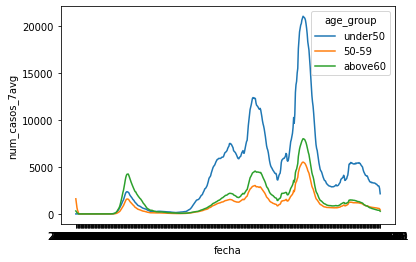

In [77]:
r = result[['fecha', 'num_casos_7avg', 'age_group']]
sns.lineplot(data=r, x="fecha", y="num_casos_7avg", hue="age_group")

### case in relation to peak of each age group

In [115]:
result['age_group'].unique()

array(['under50', '50to59', 'above60'], dtype=object)

In [ ]:
result[["num_casos_7avg"]].max(axis=0).values[0]

In [134]:
r_under50 = result[result['age_group'] == 'under50'].copy()
peak_under50 = r_under50[["num_casos_7avg"]].max(axis=0).values[0]
r_under50['pct_peak'] = r_under50['num_casos_7avg'] / peak_under50

In [135]:
r_50to59 = result[result['age_group'] == '50to59'].copy()
peak_50to59 = r_50to59[["num_casos_7avg"]].max(axis=0).values[0]
r_50to59['pct_peak'] = r_50to59['num_casos_7avg'] / peak_50to59

In [136]:
r_above60 = result[result['age_group'] == 'above60'].copy()
peak_above60 = r_above60[["num_casos_7avg"]].max(axis=0).values[0]
r_above60['pct_peak'] = pd.Series(r_above60['num_casos_7avg'] / peak_above60)

In [137]:
frames= [r_under50, r_50to59, r_above60]
result_case = pd.concat(frames)
result_case.head()

,fecha,num_casos,num_def,num_hosp,num_uci,age_group,num_casos_7avg,num_def_7avg,num_hosp_7avg,num_uci_7avg,pct_peak
0,2020-01-01,0,0,1,0,under50,0.0,0.0,1.000000,0.000000,0.0
1,2020-01-02,0,0,2,1,under50,0.0,0.0,1.500000,0.500000,0.0
2,2020-01-03,0,0,1,0,under50,0.0,0.0,1.333333,0.333333,0.0
3,2020-01-04,0,0,3,0,under50,0.0,0.0,1.750000,0.250000,0.0
4,2020-01-05,0,0,2,0,under50,0.0,0.0,1.800000,0.200000,0.0


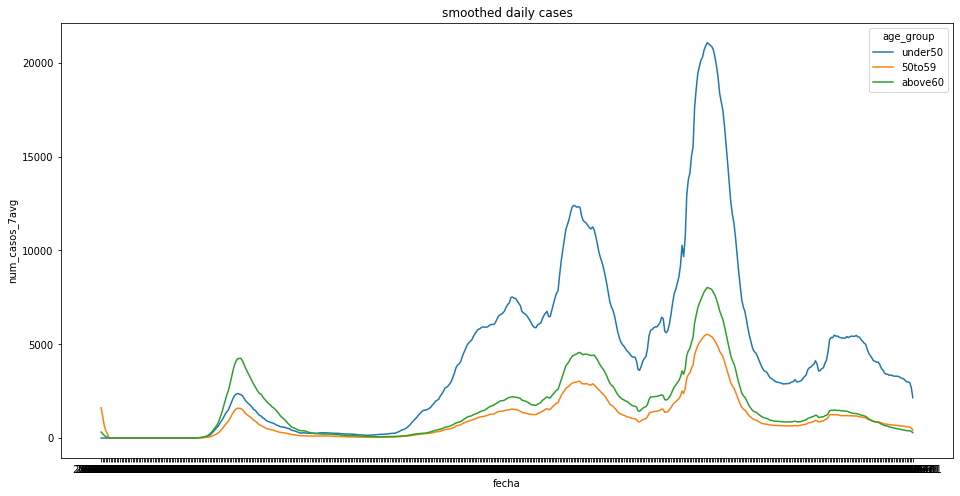

In [315]:
plt.figure(figsize=(16, 8))
r = result[['fecha', 'num_casos_7avg', 'age_group']]
sns.lineplot(data=r, x="fecha", y="num_casos_7avg", hue="age_group").set_title('smoothed daily cases')
plt.savefig('charts/vax_effect/smoothed daily cases.png')

<AxesSubplot:xlabel='fecha', ylabel='num_casos_7avg'>

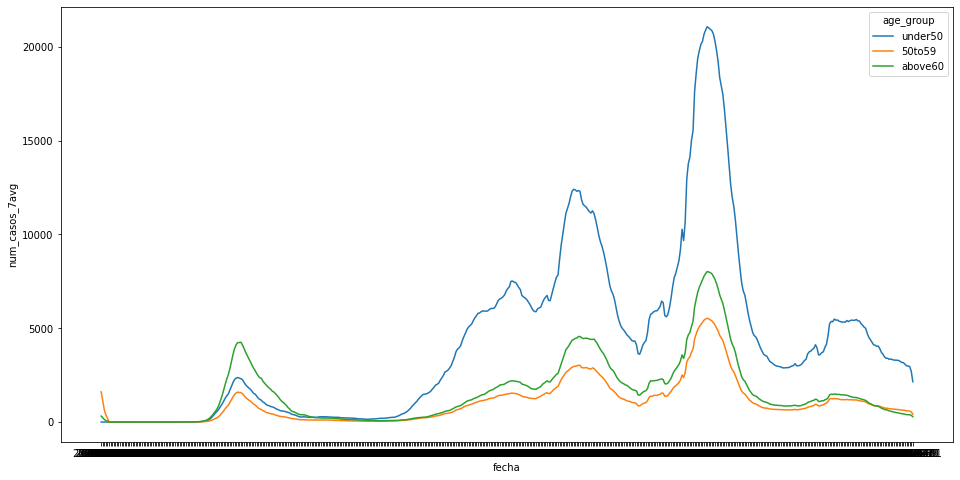

In [140]:
plt.figure(figsize=(16, 8))
r = result[['fecha', 'num_casos_7avg', 'age_group']]
sns.lineplot(data=r, x="fecha", y="num_casos_7avg", hue="age_group")


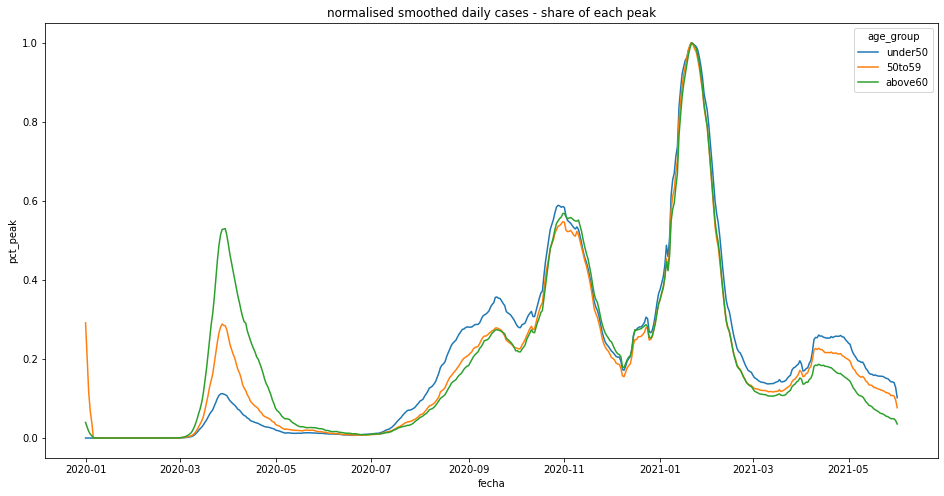

In [316]:
plt.figure(figsize=(16, 8))
r_case = result_case[['fecha', 'pct_peak', 'age_group']]
sns.lineplot(data=result_case, x="fecha", y="pct_peak", hue="age_group").set_title('normalised smoothed daily cases - share of each peak')
plt.savefig('charts/vax_effect/normalised smoothed daily cases - share of each peak.png')

In [ ]:
plt.figure(figsize=(16, 8))
r_case = result_case[['fecha', 'pct_peak', 'age_group']]
sns.lineplot(data=result_case, x="fecha", y="pct_peak", hue="age_group")

In [145]:
result

,fecha,num_casos,num_def,num_hosp,num_uci,age_group,num_casos_7avg,num_def_7avg,num_hosp_7avg,num_uci_7avg
0,2020-01-01,0,0,1,0,under50,0.000000,0.000000,1.000000,0.000000
1,2020-01-02,0,0,2,1,under50,0.000000,0.000000,1.500000,0.500000
2,2020-01-03,0,0,1,0,under50,0.000000,0.000000,1.333333,0.333333
3,2020-01-04,0,0,3,0,under50,0.000000,0.000000,1.750000,0.250000
4,2020-01-05,0,0,2,0,under50,0.000000,0.000000,1.800000,0.200000
...,...,...,...,...,...,...,...,...,...,...
513,2021-05-28,430,6,54,5,above60,393.285714,13.857143,60.714286,7.428571
514,2021-05-29,268,2,37,3,above60,391.285714,10.857143,57.285714,6.714286
515,2021-05-30,181,5,44,4,above60,389.857143,8.571429,55.285714,6.428571
516,2021-05-31,209,3,8,1,above60,354.857143,6.428571,46.428571,5.428571


In [151]:
result_case['fecha'] = pd.to_datetime(result_case['fecha'], format='%Y-%m-%d')
r_mar30 = result_case[result_case['fecha'] > '2021-03-29']

,fecha,num_casos,num_def,num_hosp,num_uci,age_group,num_casos_7avg,num_def_7avg,num_hosp_7avg,num_uci_7avg,pct_peak
454,2021-03-30,5108,1,121,12,under50,3937.428571,1.000000,104.571429,12.285714,0.186852
455,2021-03-31,5685,1,116,20,under50,4118.714286,0.857143,105.714286,13.142857,0.195455
456,2021-04-01,3414,0,115,12,under50,3943.428571,0.857143,105.571429,12.142857,0.187137
457,2021-04-02,2238,0,120,17,under50,3570.285714,0.571429,107.857143,13.000000,0.169429
458,2021-04-03,2690,3,106,13,under50,3599.285714,1.000000,109.571429,13.428571,0.170805
...,...,...,...,...,...,...,...,...,...,...,...
513,2021-05-28,430,6,54,5,above60,393.285714,13.857143,60.714286,7.428571,0.049029
514,2021-05-29,268,2,37,3,above60,391.285714,10.857143,57.285714,6.714286,0.048780
515,2021-05-30,181,5,44,4,above60,389.857143,8.571429,55.285714,6.428571,0.048602
516,2021-05-31,209,3,8,1,above60,354.857143,6.428571,46.428571,5.428571,0.044239


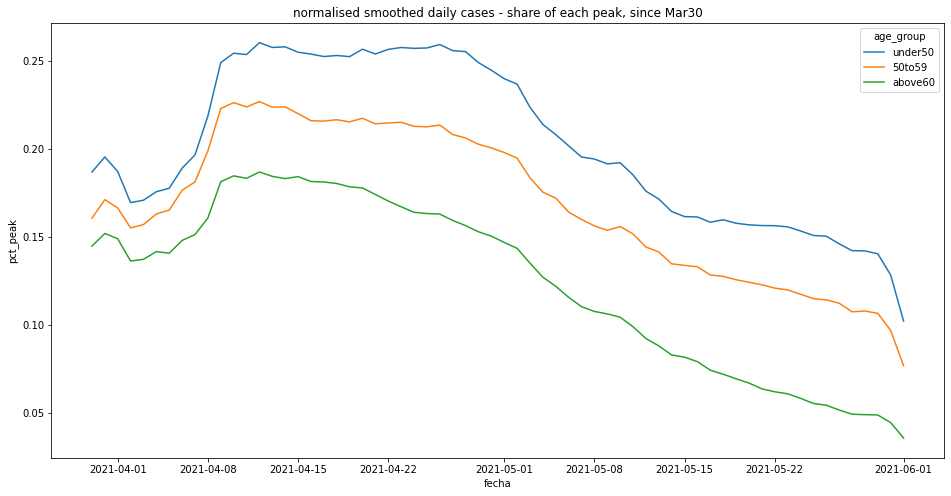

In [317]:
plt.figure(figsize=(16, 8))
r_mar30_ = r_mar30[['fecha', 'pct_peak', 'age_group']]
sns.lineplot(data=r_mar30_, x="fecha", y="pct_peak", hue="age_group").set_title('normalised smoothed daily cases - share of each peak, since Mar30')
plt.savefig('charts/vax_effect/normalised smoothed daily cases - share of each peak Mar30.png')


### 70-79 vaccine effect

In [229]:
d = df[df['grupo_edad'] == '70-79']
indexes70 = d[d['fecha'] > '2021-03-29']
indexes70.head()

,fecha,grupo_edad,num_casos,num_def,num_hosp,num_uci
4547,2021-03-30,70-79,466,27,111,15
4557,2021-03-31,70-79,507,21,110,11
4567,2021-04-01,70-79,316,11,92,16
4577,2021-04-02,70-79,199,25,92,20
4587,2021-04-03,70-79,256,21,95,18


In [230]:
vax70 = national[['fecha', 'dose1_70', 'pop_70','perc_70']]
vax70.head()

,fecha,dose1_70,pop_70,perc_70
959,2021-03-30T22:00:00000Z,152094,5336986,3.8%
960,2021-03-31T22:00:00000Z,165201,5336986,4.2%
961,2021-04-02T22:00:00000Z,171548,5336986,4.3%
962,2021-04-04T22:00:00000Z,198246,5336986,5.0%
963,2021-04-05T22:00:00000Z,216569,5336986,5.5%


In [245]:
vax70['fecha'] = pd.to_datetime(vax70['fecha']).dt.strftime('%Y-%m-%d')

<ipython-input-245-18e4763ade15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax70['fecha'] = pd.to_datetime(vax70['fecha']).dt.strftime('%Y-%m-%d')


In [272]:
df70 = indexes70.merge(vax70, on='fecha')
df70.head()

,fecha,grupo_edad,num_casos,num_def,num_hosp,num_uci,dose1_70,pop_70,perc_70
0,2021-03-30,70-79,466,27,111,15,152094,5336986,3.8%
1,2021-03-31,70-79,507,21,110,11,165201,5336986,4.2%
2,2021-04-02,70-79,199,25,92,20,171548,5336986,4.3%
3,2021-04-04,70-79,260,11,89,13,198246,5336986,5.0%
4,2021-04-05,70-79,466,17,127,17,216569,5336986,5.5%


In [273]:
df70['num_casos_7avg'] = df70['num_casos'].rolling(7, min_periods=1).mean()
df70['num_def_7avg'] = df70['num_def'].rolling(7, min_periods=1).mean()
df70['num_hosp_7avg'] = df70['num_hosp'].rolling(7, min_periods=1).mean()
df70['num_uci_7avg'] = df70['num_uci'].rolling(7, min_periods=1).mean()

In [274]:
d70 = df[df['grupo_edad'] == '70-79']
d70['num_casos_7avg'] = d70['num_casos'].rolling(7, min_periods=1).mean()
d70['num_def_7avg'] = d70['num_def'].rolling(7, min_periods=1).mean()
d70['num_hosp_7avg'] = d70['num_hosp'].rolling(7, min_periods=1).mean()
d70['num_uci_7avg'] = d70['num_uci'].rolling(7, min_periods=1).mean()
max_avg7casos_70 = d70['num_casos_7avg'].max()

<ipython-input-274-8ff4fee0f09a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d70['num_casos_7avg'] = d70['num_casos'].rolling(7, min_periods=1).mean()
<ipython-input-274-8ff4fee0f09a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d70['num_def_7avg'] = d70['num_def'].rolling(7, min_periods=1).mean()
<ipython-input-274-8ff4fee0f09a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [275]:
df70['casos_peck_pct'] = df70['num_casos_7avg']/max_avg7casos_70

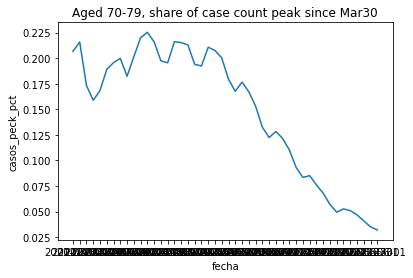

In [322]:
sns.lineplot(data=df70, x="fecha", y="casos_peck_pct").set_title('Aged 70-79, share of case count peak since Mar30')
plt.savefig('charts/vax_effect/Aged 70-79, share of case count peak.png')

In [277]:
df70['perc_70'] = df70['perc_70'].str.rstrip('%').astype('float') / 100.0

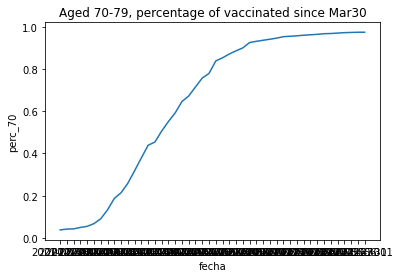

In [323]:
sns.lineplot(data=df70, x="fecha", y="perc_70").set_title('Aged 70-79, percentage of vaccinated since Mar30')
plt.savefig('charts/vax_effect/Aged 70-79, percentage of vaccinated.png')

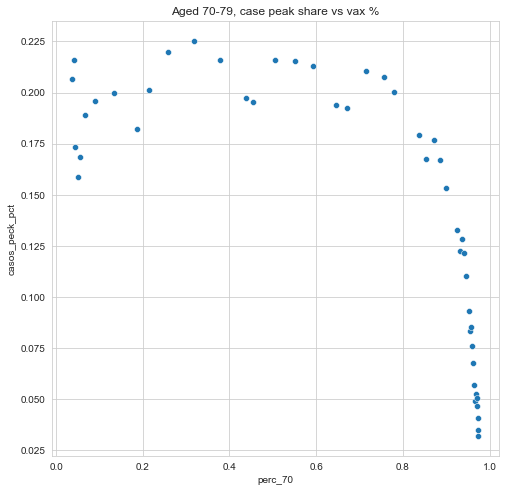

In [345]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df70, x="perc_70", y="casos_peck_pct").set_title('Aged 70-79, case peak share vs vax %')
plt.savefig('charts/vax_effect/Aged 70-79, case peak share vs vax %.png')

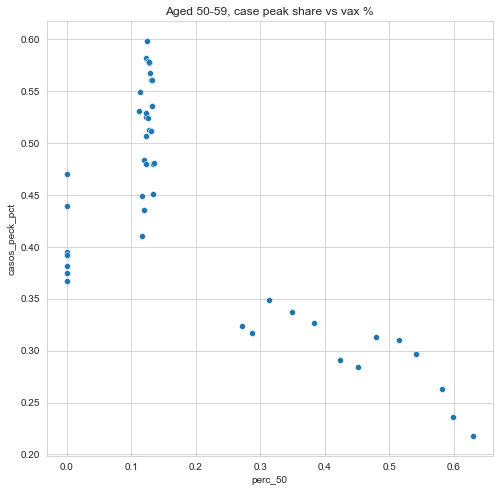

In [346]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df50, x="perc_50", y="casos_peck_pct").set_title('Aged 50-59, case peak share vs vax %')
plt.savefig('charts/vax_effect/Aged 50-59, case peak share vs vax %.png')

## 50 - 59 

In [ ]:
selected = '50-59'

In [283]:
d = df[df['grupo_edad'] == selected ]
indexes50 = d[d['fecha'] > '2021-03-29']
vax50 = national[['fecha', 'dose1_50', 'pop_50','perc_50']]
vax50['fecha'] = pd.to_datetime(vax50['fecha']).dt.strftime('%Y-%m-%d')
df50 = indexes50.merge(vax50, on='fecha')

<ipython-input-283-30d16322e6b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax50['fecha'] = pd.to_datetime(vax50['fecha']).dt.strftime('%Y-%m-%d')


In [285]:
df50['num_casos_7avg'] = df50['num_casos'].rolling(7, min_periods=1).mean()
df50['num_def_7avg'] = df50['num_def'].rolling(7, min_periods=1).mean()
df50['num_hosp_7avg'] = df50['num_hosp'].rolling(7, min_periods=1).mean()
df50['num_uci_7avg'] = df50['num_uci'].rolling(7, min_periods=1).mean()

In [286]:
d50 = df[df['grupo_edad'] == '70-79']
d50['num_casos_7avg'] = d50['num_casos'].rolling(7, min_periods=1).mean()
d50['num_def_7avg'] = d50['num_def'].rolling(7, min_periods=1).mean()
d50['num_hosp_7avg'] = d50['num_hosp'].rolling(7, min_periods=1).mean()
d50['num_uci_7avg'] = d50['num_uci'].rolling(7, min_periods=1).mean()
max_avg7casos_50 = d50['num_casos_7avg'].max()

<ipython-input-286-e1c4cd5901fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d50['num_casos_7avg'] = d50['num_casos'].rolling(7, min_periods=1).mean()
<ipython-input-286-e1c4cd5901fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d50['num_def_7avg'] = d50['num_def'].rolling(7, min_periods=1).mean()
<ipython-input-286-e1c4cd5901fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [288]:
df50['casos_peck_pct'] = df50['num_casos_7avg']/max_avg7casos_50

In [290]:
df50['perc_50'] = df50['perc_50'].str.rstrip('%').astype('float') / 100.0

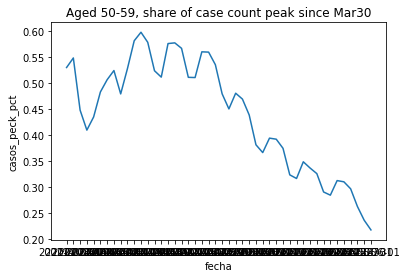

In [325]:
sns.lineplot(data=df50, x="fecha", y="casos_peck_pct").set_title('Aged 50-59, share of case count peak since Mar30')
plt.savefig('charts/vax_effect/Aged 50-59, share of case count peak.png')

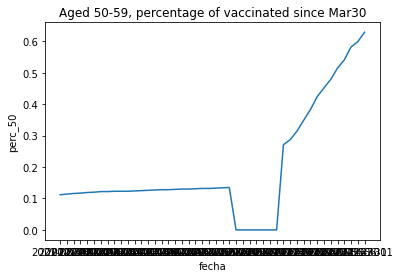

In [324]:
sns.lineplot(data=df50, x="fecha", y="perc_50").set_title('Aged 50-59, percentage of vaccinated since Mar30')
plt.savefig('charts/vax_effect/Aged 50-59, percentage of vaccinated.png')

In [89]:
num_uci_7avg_peak = result[["num_casos_7avg"]].max(axis=0).values[0]

In [90]:
num_uci_7avg_peak

21072.428571428572

In [92]:
result['num_casos_7avg_vs_7avgpeak'] = result['num_casos_7avg']/ num_uci_7avg_peak

<AxesSubplot:xlabel='fecha', ylabel='num_casos_7avg_vs_7avgpeak'>

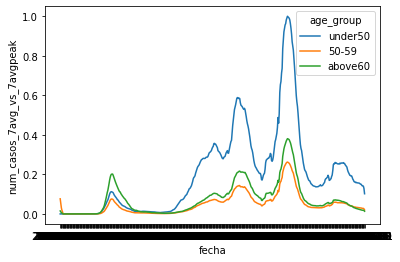

In [94]:
r = result[['fecha', 'num_casos_7avg_vs_7avgpeak', 'age_group']]
sns.lineplot(data=r, x="fecha", y="num_casos_7avg_vs_7avgpeak", hue="age_group")

### first dataset
case, hospitalization by province
-> sum by ccaa

In [16]:
df_raw = pd.read_csv('data/casos_hosp_uci_def_sexo_edad_provres.csv')

In [17]:
df_raw.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


In [18]:
df_raw['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [19]:
wiki = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:ES',
                          flavor='bs4')

In [20]:
provinces =  wiki[1]

In [21]:
provinces['provincia_iso'] = provinces['Code'].str.split('-',expand=True).iloc[:,1]

In [22]:
df = pd.merge(df_raw, provinces, how="inner", left_on = "provincia_iso", right_on="provincia_iso")

In [39]:
df.columns = ['provincia_iso', 'sexo', 'grupo_edad', 'fecha', 'num_casos', 'num_hosp',
       'num_uci', 'num_def', 'code', 'subdivision',
       'ccaa']
df = df.rename(columns={"ccaa": "ccaa_iso"})

In [40]:
df.head()

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,code,subdivision,ccaa_iso
0,A,H,0-9,2020-01-01,0,0,0,0,ES-A,AlicanteAlacant (ca),VC
1,A,H,10-19,2020-01-01,0,0,0,0,ES-A,AlicanteAlacant (ca),VC
2,A,H,20-29,2020-01-01,0,0,0,0,ES-A,AlicanteAlacant (ca),VC
3,A,H,30-39,2020-01-01,0,0,0,0,ES-A,AlicanteAlacant (ca),VC
4,A,H,40-49,2020-01-01,0,0,0,0,ES-A,AlicanteAlacant (ca),VC


In [45]:
df[df['ccaa_iso'] == 'CT']['provincia_iso'].unique()

array(['B', 'GI', 'L', 'T'], dtype=object)

In [ ]:
group by ccaa

In [177]:
# table = pd.pivot_table(df, values=['num_casos', 'num_hosp', 'num_uci', 'num_def'] , index=['fecha','grupo_edad'],
#                     columns=['ccaa_iso'], aggfunc=np.sum)

table = pd.pivot_table(df, values=['num_casos', 'num_hosp', 'num_uci', 'num_def']  , index=['fecha','grupo_edad','ccaa_iso'],
                    columns=['sexo'], aggfunc=np.sum, margins = True)

table

num_casos                         num_def  \
sexo                                   H        M    NC      All       H   
fecha      grupo_edad ccaa_iso                                             
2020-01-01 0-9        AN               0        0     0        0       0   
                      AR               0        0     0        0       0   
                      AS               0        0     0        0       0   
                      CB               0        0     0        0       0   
                      CL               0        0     0        0       0   
...                                  ...      ...   ...      ...     ...   
2021-06-01 NC         MD               0        0     0        0       0   
                      PV               0        0     0        0       0   
                      RI               0        0     0        0       0   
                      VC               0        0     0        0       0   
All                              1705266  1870259  6580  3582105   43212   

                                                 num_hosp                \
sexo                                M  NC    All        H       M    NC   
fecha      grupo_edad ccaa_iso                                            
2020-01-01 0-9        AN            0   0      0        0       0     0   
                      AR            0   0      0        0       0     0   
                      AS            0   0      0        0       0     0   
                      CB            0   0      0        0       0     0   
                      CL            0   0      0        0       0     0   
...                               ...  ..    ...      ...     ...   ...   
2021-06-01 NC         MD            0   0      0        0       0     0   
                      PV            0   0      0        0       0     0   
                      RI            0   0      0        0       0     0   
                      VC            0   0      0        0       0     0   
All                             34892  98  78202   192655  157702  1711   

                                       num_uci                     
sexo                               All       H      M   NC    All  
fecha      grupo_edad ccaa_iso                                     
2020-01-01 0-9        AN             0       0      0    0      0  
                      AR             0       0      0    0      0  
                      AS             0       0      0    0      0  
                      CB             0       0      0    0      0  
                      CL             0       0      0    0      0  
...                                ...     ...    ...  ...    ...  
2021-06-01 NC         MD             0       0      0    0      0  
                      PV             0       0      0    0      0  
                      RI             0       0      0    0      0  
                      VC             0       0      0    0      0  
All                             352068   22691  10297  113  33101  

[82881 rows x 16 columns]

In [163]:
df['grupo_edad'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'NC'], dtype=object)

In [186]:
t = pd.DataFrame(table.reset_index().to_records()) # multiindex become columns and new index is integers only

In [198]:
t.columns = [col.replace('(','').replace(')','').replace('\'','').replace(' ','').replace(',','-') for col in t.columns.values]

In [201]:
t2 = t[['fecha-','grupo_edad-', 'ccaa_iso-', 'num_casos-All', 'num_def-All', 'num_hosp-All', 'num_uci-All']]

In [204]:
t2.columns = [col.split('-')[0] for col in t2.columns.values]

In [207]:
t2 = t2[t2['fecha'] != 'All']

In [316]:
t2.to_csv('export/ccaa_indexes.csv', index=False)

## By CCAA

In [211]:
ct = t2[t2['ccaa_iso'] == 'CT']
ct_casos_long = ct[['fecha', 'grupo_edad','num_casos']]
ct_casos_wide = ct_casos_long.pivot('fecha', 'grupo_edad','num_casos')
sns.lineplot(data=ct_casos_long, x="fecha", y="num_casos", hue="grupo_edad")

In [313]:
def ccaa_plotting(ccaa_iso, var):
    ccaa = t2[t2['ccaa_iso'] ==ccaa_iso.upper()]
    ccaa_long = ccaa[['fecha', 'grupo_edad',var]]
#     ccaa_wide = ccaa_long.pivot('fecha', 'grupo_edad',var)
    return sns.lineplot(data=ccaa_long, x="fecha", y = var, hue="grupo_edad").set_title(ccaa_iso + ' | '+ var )

In [303]:
ccaa_iso_list = t2['ccaa_iso'].unique()
indexes = ['num_casos', 'num_hosp', 'num_uci', 'num_def']

In [304]:
selected_ccaa = ['md', 'ct', 'ga', 'cn']

In [311]:
for c in ccaa_iso_list:
    for i in indexes:
        ccaa_plotting(c, i)
        plt.savefig('charts/' + c + '-'+ i + ".png")
        plt.close()

Text(0.5, 1.0, 'ct | num_casos')

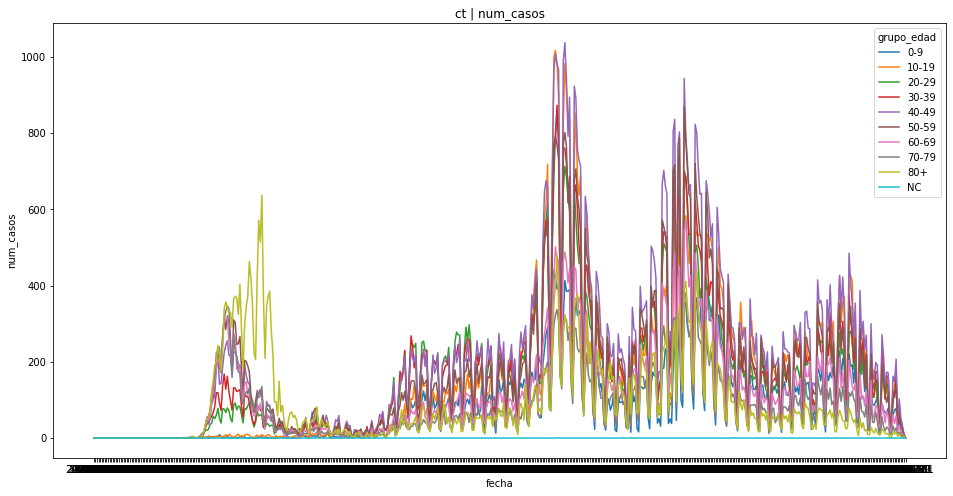

In [314]:
plt.figure(figsize=(16, 8))
ccaa_plotting('ct', 'num_casos')

<AxesSubplot:xlabel='fecha', ylabel='num_hosp'>

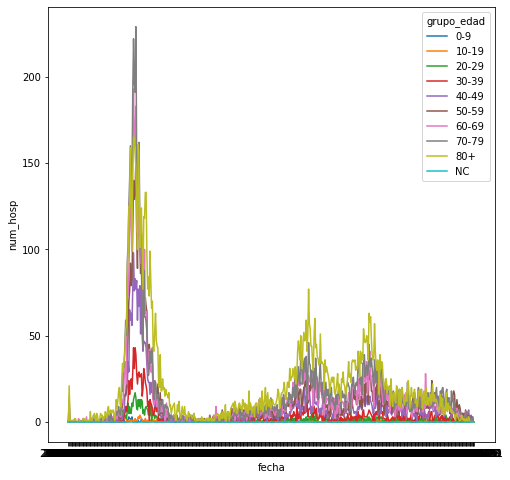

In [277]:
ccaa_plotting('ct', 'num_hosp')

<AxesSubplot:xlabel='fecha', ylabel='num_uci'>

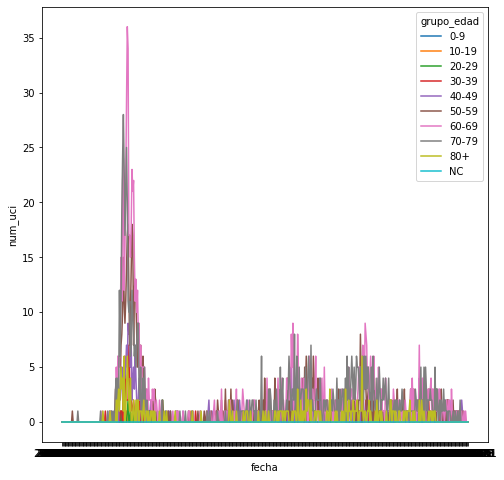

In [284]:
ccaa_plotting('ct', 'num_uci')

<AxesSubplot:xlabel='fecha', ylabel='num_uci'>

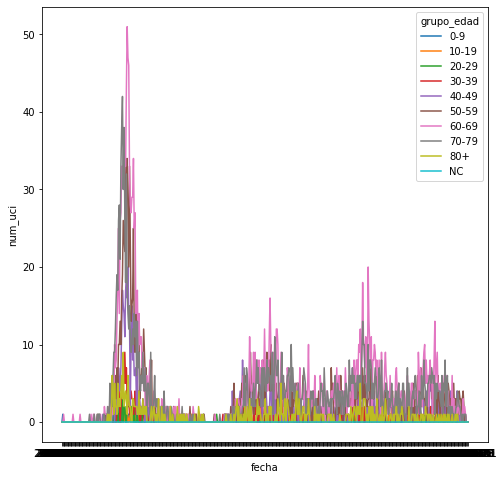

In [282]:
ccaa_plotting('md', 'num_uci')

<AxesSubplot:xlabel='fecha', ylabel='num_hosp'>

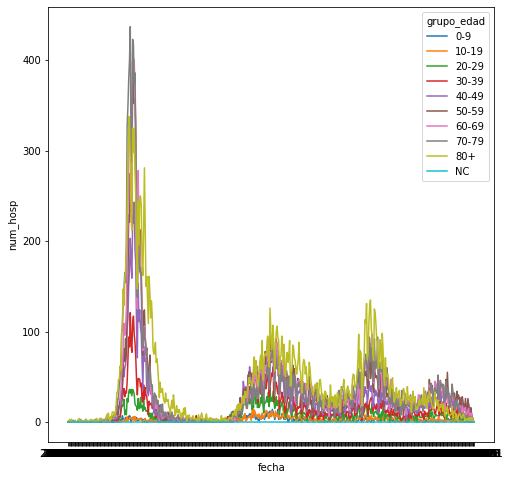

In [285]:
ccaa_plotting('md', 'num_hosp')

In [ ]:
ccaa_plotting('md', 'num_')

In [148]:
table.reset_index(inplace=False )

fecha grupo_edad num_casos                                      \
ccaa_iso                               AN AR AS CB CL CM CN CT EX GA IB MC MD   
0         2020-01-01        0-9         0  0  0  0  0  0  0  0  0  0  0  0  0   
1         2020-01-01      10-19         0  0  0  0  0  0  0  0  0  0  0  0  0   
2         2020-01-01      20-29         0  0  0  0  0  0  0  0  0  0  0  0  0   
3         2020-01-01      30-39         0  0  0  0  0  0  0  0  0  0  0  0  0   
4         2020-01-01      40-49         0  0  0  0  0  0  0  0  0  0  0  0  0   
...              ...        ...       ... .. .. .. .. .. .. .. .. .. .. .. ..   
5175      2021-06-01      50-59         0  0  0  0  0  0  0  0  0  0  0  0  0   
5176      2021-06-01      60-69         0  0  0  0  0  0  0  0  0  0  0  0  0   
5177      2021-06-01      70-79         0  0  0  0  0  0  0  0  0  0  0  0  0   
5178      2021-06-01        80+         0  0  0  0  0  0  0  0  0  0  0  0  0   
5179      2021-06-01         NC         0  0  0  0  0  0  0  0  0  0  0  0  0   

                   
ccaa_iso PV RI VC  
0         0  0  0  
1         0  0  0  
2         0  0  0  
3         0  0  0  
4         0  0  0  
...      .. .. ..  
5175      1  0  0  
5176      0  0  0  
5177      0  0  0  
5178      1  0  0  
5179      0  0  0  

[5180 rows x 18 columns]

In [129]:
t = table.unstack().reset_index() 
t.head()

fecha num_casos                                            \
ccaa_iso                      AN                                             
grupo_edad                   0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79   
0           2020-01-01         0     0     0     0     0     0     0     0   
1           2020-01-02         0     0     0     0     0     0     0     0   
2           2020-01-03         0     0     0     0     0     0     0     0   
3           2020-01-04         0     0     0     0     0     0     0     0   
4           2020-01-05         0     0     0     0     0     0     0     0   

                ... num_uci                                                   
ccaa_iso        ...      VC                                                   
grupo_edad 80+  ...     0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79 80+ NC  
0            0  ...       0     0     0     0     0     0     0     0   0  0  
1            0  ...       0     0     0     0     0     0     0     0   0  0  
2            0  ...       0     0     0     0     0     0     0     0   0  0  
3            0  ...       0     0     0     0     0     0     0     0   0  0  
4            0  ...       0     0     0     0     0     0     0     0   0  0  

[5 rows x 641 columns]

In [99]:
def num_casos(row):
    if row['level_0'] == 'num_casos': 
        return row['value']
def num_hosp(row):
    if row['level_0'] == 'num_hosp': 
        return row['value']
def num_uci(row):
    if row['level_0'] == 'num_uci': 
        return row['value']
def num_def(row):
    if row['level_0'] == 'num_def': 
        return row['value']

In [100]:
t['num_casos'] = t.apply(num_casos, axis=1)
t['num_hosp'] = t.apply(num_hosp, axis=1)
t['num_uci'] = t.apply(num_uci, axis=1)
t['num_def'] = t.apply(num_def, axis=1)

In [210]:
t2 = t[['ccaa_iso', 'fecha','num_casos', 'num_hosp', 'num_uci', 'num_def']]

KeyError: "None of [Index(['ccaa_iso', 'fecha', 'num_casos', 'num_hosp', 'num_uci', 'num_def'], dtype='object')] are in the [columns]"

,fecha,grupo_edad,ccaa_iso,num_casos,num_def,num_hosp,num_uci
0,2020-01-01,0-9,AN,0,0,0,0
1,2020-01-01,0-9,AR,0,0,0,0
2,2020-01-01,0-9,AS,0,0,0,0
3,2020-01-01,0-9,CB,0,0,0,0
4,2020-01-01,0-9,CL,0,0,0,0
...,...,...,...,...,...,...,...
82875,2021-06-01,NC,MC,0,0,0,0
82876,2021-06-01,NC,MD,0,0,0,0
82877,2021-06-01,NC,PV,0,0,0,0
82878,2021-06-01,NC,RI,0,0,0,0


In [115]:
covid = t2.groupby(['fecha', 'ccaa_iso']).sum().reset_index()
covid

,fecha,ccaa_iso,num_casos,num_hosp,num_uci,num_def
0,2020-01-01,AN,0.0,3.0,0.0,0.0
1,2020-01-01,AR,0.0,0.0,0.0,0.0
2,2020-01-01,AS,0.0,0.0,0.0,0.0
3,2020-01-01,CB,0.0,0.0,0.0,0.0
4,2020-01-01,CL,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
8283,2021-06-01,MC,0.0,0.0,0.0,0.0
8284,2021-06-01,MD,0.0,0.0,0.0,0.0
8285,2021-06-01,PV,13.0,0.0,0.0,0.0
8286,2021-06-01,RI,0.0,0.0,0.0,0.0


In [126]:
an = df[df['ccaa_iso'] == 'AN']
an[an['fecha'] == '2020-01-01']['num_hosp'].sum()

3

In [105]:
# pd.pivot_table(t2, values=['num_casos', 'num_hosp', 'num_uci', 'num_def'] , index=['fecha'],
#                     columns=['ccaa_iso'], aggfunc=np.sum)

num_casos                                                       \
ccaa_iso          AN     AR    AS    CB     CL     CM     CN     CT    EX   
fecha                                                                       
2020-01-01       0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
2020-01-02       0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
2020-01-03       0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
2020-01-04       0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
2020-01-05       0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
...              ...    ...   ...   ...    ...    ...    ...    ...   ...   
2021-05-28    1321.0  173.0  71.0  19.0  266.0  182.0  106.0  507.0  51.0   
2021-05-29     930.0  112.0  67.0  33.0  118.0   62.0   71.0  222.0  45.0   
2021-05-30     448.0   45.0  28.0  37.0   84.0   38.0   84.0  155.0  43.0   
2021-05-31     156.0  131.0  74.0  33.0  268.0    1.0   75.0   55.0  77.0   
2021-06-01       0.0    0.0   0.0   0.0    0.0    0.0    1.0    0.0   0.0   

                   ... num_uci                                               
ccaa_iso       GA  ...      CN   CT   EX   GA   IB   MC   MD   PV   RI   VC  
fecha              ...                                                       
2020-01-01    0.0  ...     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-02    0.0  ...     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2020-01-03    0.0  ...     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2020-01-04    0.0  ...     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-05    0.0  ...     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...           ...  ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2021-05-28  120.0  ...     0.0  0.0  0.0  2.0  0.0  1.0  5.0  0.0  0.0  0.0  
2021-05-29  109.0  ...     0.0  1.0  0.0  1.0  0.0  0.0  4.0  0.0  0.0  0.0  
2021-05-30   77.0  ...     1.0  0.0  1.0  2.0  1.0  0.0  0.0  0.0  0.0  3.0  
2021-05-31   35.0  ...     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2021-06-01    0.0  ...     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[518 rows x 64 columns]

In [ ]:
t['num_casos'] = o 

def numpy_where(df):
  return df.assign(is_rich=np.where(df['salary'] >= 50, 'yes', 'no'))


In [88]:
t[t['level_0'] == 'num_casos']

,level_0,ccaa_iso,fecha,value
0,num_casos,AN,2020-01-01,0
1,num_casos,AN,2020-01-02,0
2,num_casos,AN,2020-01-03,0
3,num_casos,AN,2020-01-04,0
4,num_casos,AN,2020-01-05,0
...,...,...,...,...
8283,num_casos,VC,2021-05-28,175
8284,num_casos,VC,2021-05-29,105
8285,num_casos,VC,2021-05-30,45
8286,num_casos,VC,2021-05-31,59


### Second dataset
vaccination by ccaa

In [25]:
vax = pd.read_csv('../../app/public/data.csv')
vax.head()

,ccaa,entregadas,administradas,admin_entregadas,hasta,fecha,pfizer,moderna,astrazeneca,vacuna_completa
0,Andalucía,140295,25809,18.4,2021-01-02T23:00:00.000Z,2021-01-03T23:00:00.000Z,NaN,NaN,NaN,NaN
1,Andalucía,140295,53934,38.4,2021-01-05T23:00:00.000Z,2021-01-06T23:00:00.000Z,NaN,NaN,NaN,NaN
2,Andalucía,140295,69445,49.5,2021-01-06T23:00:00.000Z,2021-01-07T23:00:00.000Z,NaN,NaN,NaN,NaN
3,Andalucía,140295,81387,58.0,2021-01-08T23:00:00.000Z,2021-01-10T23:00:00.000Z,NaN,NaN,NaN,NaN
4,Andalucía,140295,94879,67.6,2021-01-10T23:00:00.000Z,2021-01-11T23:00:00.000Z,NaN,NaN,NaN,NaN


In [35]:
ccaa = wiki[0]
ccaa['ccaa_iso'] = ccaa['Code'].str.split('-',expand=True).iloc[:,1]
ccaa = ccaa.rename(columns={"Subdivision name (es)[note 1]": "ccaa"})

In [37]:
vf = pd.merge(vax, ccaa, how="inner", left_on = "ccaa", right_on="ccaa")

In [38]:
vf

,ccaa,entregadas,administradas,admin_entregadas,hasta,fecha,pfizer,moderna,astrazeneca,vacuna_completa,Code,Subdivision name (en)[note 2],Subdivision category,ccaa_iso
0,Andalucía,140295,25809,18.4,2021-01-02T23:00:00.000Z,2021-01-03T23:00:00.000Z,NaN,NaN,NaN,NaN,ES-AN,Andalusia,autonomous community,AN
1,Andalucía,140295,53934,38.4,2021-01-05T23:00:00.000Z,2021-01-06T23:00:00.000Z,NaN,NaN,NaN,NaN,ES-AN,Andalusia,autonomous community,AN
2,Andalucía,140295,69445,49.5,2021-01-06T23:00:00.000Z,2021-01-07T23:00:00.000Z,NaN,NaN,NaN,NaN,ES-AN,Andalusia,autonomous community,AN
3,Andalucía,140295,81387,58.0,2021-01-08T23:00:00.000Z,2021-01-10T23:00:00.000Z,NaN,NaN,NaN,NaN,ES-AN,Andalusia,autonomous community,AN
4,Andalucía,140295,94879,67.6,2021-01-10T23:00:00.000Z,2021-01-11T23:00:00.000Z,NaN,NaN,NaN,NaN,ES-AN,Andalusia,autonomous community,AN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,Melilla,39960,35862,89.7,2021-05-25T22:00:00.000Z,2021-05-26T22:00:00.000Z,24210.0,3700.0,11000.0,9461.0,ES-ML,Melilla,autonomous city in North Africa,ML
1036,Melilla,39960,37873,94.8,2021-05-26T22:00:00.000Z,2021-05-27T22:00:00.000Z,24210.0,3700.0,11000.0,10733.0,ES-ML,Melilla,autonomous city in North Africa,ML
1037,Melilla,39960,38610,96.6,2021-05-27T22:00:00.000Z,2021-05-30T22:00:00.000Z,24210.0,3700.0,11000.0,11428.0,ES-ML,Melilla,autonomous city in North Africa,ML
1038,Melilla,45240,38634,85.4,2021-05-27T22:00:00.000Z,2021-05-31T22:00:00.000Z,28890.0,3700.0,11000.0,11443.0,ES-ML,Melilla,autonomous city in North Africa,ML


In [ ]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(df, row="ccaa",col="fecha",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "num_casos")

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


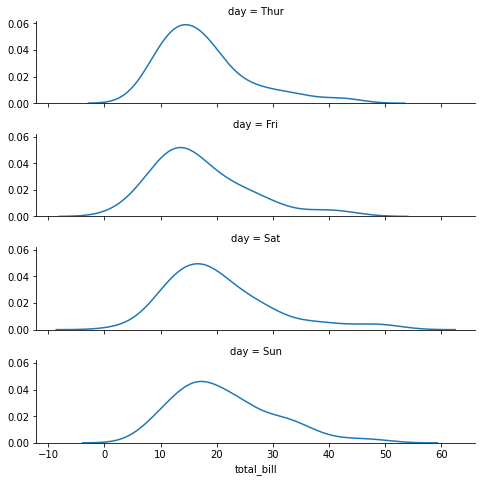

In [47]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill")